<a href="https://colab.research.google.com/github/ikarteeva/SMATrading/blob/main/SMATrading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web

In [7]:
start = datetime.datetime(2020, 2, 1) 
end = datetime.datetime(2021, 2, 1) 

In [61]:
ultratech_df = web.DataReader(['LTC-BTC'], 'yahoo', start = start, end = end)['Close']
ultratech_df.columns = {'Close Price'}
ultratech_df.head()

,Close Price
Date,
2020-02-01,0.007540
2020-02-02,0.007516
2020-02-03,0.007508
2020-02-04,0.007428
2020-02-05,0.007541


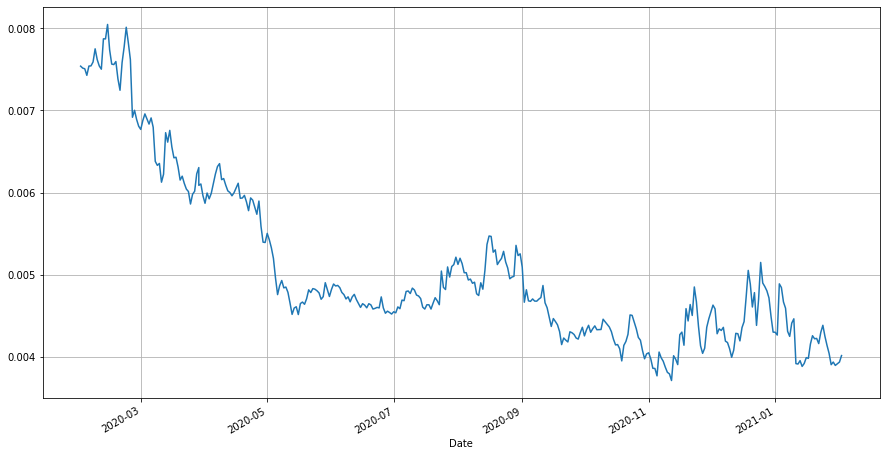

In [11]:
ultratech_df["Close Price"].plot(figsize = (15, 8))
plt.grid()
plt.show()

In [48]:
ultratech_df["1_SMA"] = ultratech_df["Close Price"].rolling(window = 1, min_periods = 1).mean()
ultratech_df["5_SMA"] = ultratech_df["Close Price"].rolling(window = 5, min_periods = 1).mean()

In [50]:
ultratech_df['Signal'] = 0.0
ultratech_df['Signal'] = np.where(ultratech_df['1_SMA'] > ultratech_df['5_SMA'], 1.0, 0.0)

In [51]:
ultratech_df.head()

,Close Price,1_SMA,5_SMA,Signal
Date,,,,
2020-02-01,0.007540,0.007540,0.007540,0.0
2020-02-02,0.007516,0.007516,0.007528,0.0
2020-02-03,0.007508,0.007508,0.007521,0.0
2020-02-04,0.007428,0.007428,0.007498,0.0
2020-02-05,0.007541,0.007541,0.007507,1.0


In [52]:
ultratech_df["Position"] = ultratech_df["Signal"].diff()

ultratech_df.head()

,Close Price,1_SMA,5_SMA,Signal,Position
Date,,,,,
2020-02-01,0.007540,0.007540,0.007540,0.0,NaN
2020-02-02,0.007516,0.007516,0.007528,0.0,0.0
2020-02-03,0.007508,0.007508,0.007521,0.0,0.0
2020-02-04,0.007428,0.007428,0.007498,0.0,0.0
2020-02-05,0.007541,0.007541,0.007507,1.0,1.0


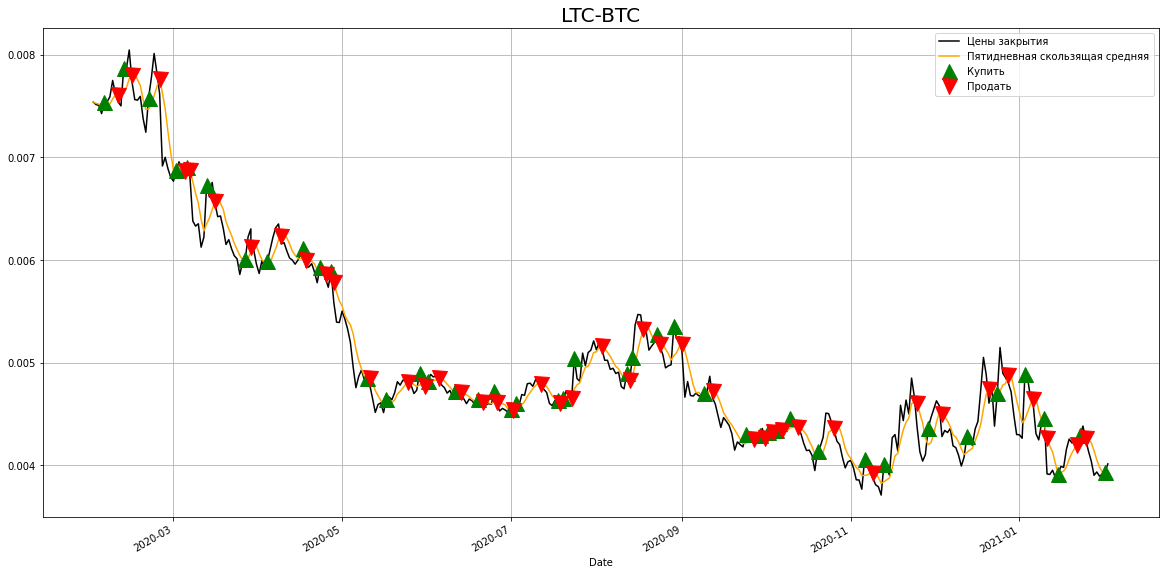

In [60]:
plt.figure(figsize = (20,10))


ultratech_df["Close Price"].plot(color = "black", label= "Цены закрытия") 
ultratech_df["5_SMA"].plot(color = "orange",label = "Пятидневная скользящая средняя") 


plt.plot(ultratech_df[ultratech_df["Position"] == 1].index, 
         ultratech_df["1_SMA"][ultratech_df["Position"] == 1], 
         "^", markersize = 15, color = "g", label = 'Купить')


plt.plot(ultratech_df[ultratech_df["Position"] == -1].index, 
         ultratech_df["5_SMA"][ultratech_df["Position"] == -1], 
         "v", markersize = 15, color = "r", label = 'Продать')

plt.title('LTC-BTC', fontsize = 20)
plt.legend()
plt.grid()
plt.show()